In [100]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import colors
import pandas as pd 

In [17]:
all_data = load_iris()

In [18]:
print(all_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
target_data = all_data.target

In [39]:
data = pd.DataFrame(all_data.data, columns=all_data.feature_names)

In [43]:
data.drop(columns = data.columns[2:4], inplace = True)

In [48]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## Split our data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, target_data, test_size = 0.30)

## Train our data

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [52]:
lda = LinearDiscriminantAnalysis()

In [53]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [54]:
predicted_targets = lda.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(predicted_targets, y_test)

0.8222222222222222

## Visualize

In [63]:
import matplotlib.pyplot as plt

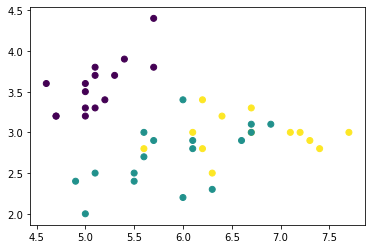

In [69]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_test[X_test.columns[0]], X_test[X_test.columns[1]], c=y_test)
plt.show()

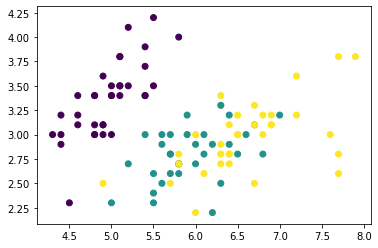

In [68]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train[X_train.columns[0]], X_train[X_train.columns[1]], c=y_train)
plt.show()

In [71]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

In [73]:
s_length = 'sepal length (cm)'
s_width = 'sepal width (cm)'

In [87]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[[s_length, s_width]]
sy_train = y_train[(y_train == 0) | (y_train == 2)]

small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[[s_length, s_width]]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

In [88]:
sy_train

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2])

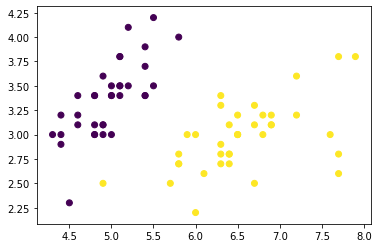

In [89]:
plt.scatter(small_train[s_length], small_train[s_width], c=sy_train)
plt.show()

In [91]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [94]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.96285714, 3.36571429],
       [6.55405405, 2.97297297]])

In [102]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

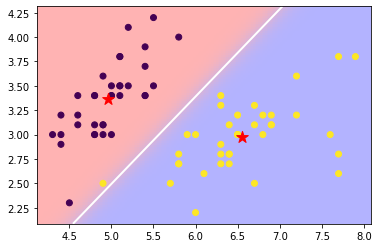

In [103]:

# сам scatter plot
plt.scatter(small_train[s_length], small_train[s_width], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [107]:
lda_small.coef_

array([[ 10.55201701, -11.77823951]])

### Нормально что у меня дискриминантная линия не перпендикулярная?

## Кластеризация

In [110]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


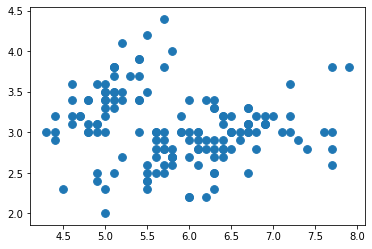

In [114]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], cmap='autumn', s=60)

## Transform to the same scale

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [124]:
X_scaled = scaler.fit_transform(data)

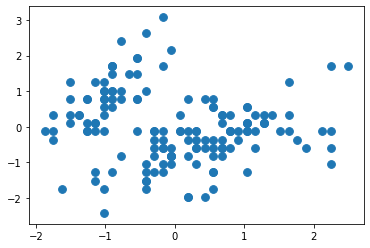

In [125]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

## Apply learning algorithm

In [126]:
from sklearn.cluster import KMeans

In [131]:
k_means = KMeans(n_clusters=3) 
clusters = k_means.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

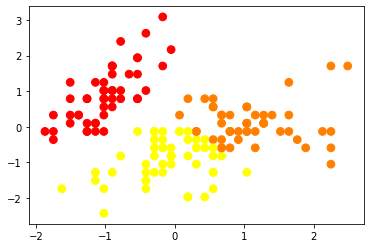

In [132]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

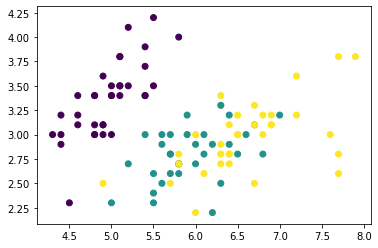

In [134]:
plt.scatter(X_train[X_train.columns[0]], X_train[X_train.columns[1]], c=y_train)
plt.show()

## График локтя

In [142]:
k_inertia = []

for i in range(1, 20):
    model = KMeans(n_clusters=i)
    model.fit_predict(X_scaled)
    k_inertia.append(model.inertia_)

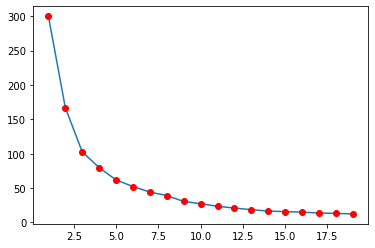

In [140]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')